In [1]:
class Node:
    def __init__(self, data):
        """
        Inicializa um nó com um valor de dado e um ponteiro para o próximo nó.
        
        :param data: Valor armazenado no nó.
        """
        self.data = data
        self.next = None  # Inicialmente, o nó não aponta para nenhum próximo nó.

    def __repr__(self):
        """
        Representação amigável do nó para depuração.
        
        :return: String com o valor do dado.
        """
        return f"Node({self.data})"


# Exemplo de uso:
if __name__ == "__main__":
    # Criando nós
    node1 = Node(10)
    node2 = Node(20)
    node3 = Node(30)
    
    # Ligando os nós
    node1.next = node2
    node2.next = node3
    
    # Iterando pela lista encadeada
    current = node1
    while current is not None:
        print(current)
        current = current.next


Node(10)
Node(20)
Node(30)


In [2]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

    def __repr__(self):
        return str(self.data)


class LinkedList:
    def __init__(self):
        self.head = None
        self.size = 0  # Mantém o tamanho da lista em O(1)

    def __len__(self):
        return self.size

    def __str__(self):
        values = []
        current = self.head
        while current:
            values.append(current.data)
            current = current.next
        return str(values)

    def __getitem__(self, index):
        return self.read(index)

    def __setitem__(self, index, value):
        node = self._get_node_at(index)
        if node:
            node.data = value
        else:
            raise IndexError("Index out of range")

    def _get_node_at(self, index):
        if index < 0 or index >= self.size:
            raise IndexError("Index out of range")
        current = self.head
        for _ in range(index):
            current = current.next
        return current

    def read(self, index):
        node = self._get_node_at(index)
        return node.data

    def search(self, value):
        current = self.head
        index = 0
        while current:
            if current.data == value:
                return index
            current = current.next
            index += 1
        return -1

    def insert(self, index, value):
        if index < 0 or index > self.size:
            raise IndexError("Index out of range")
        new_node = Node(value)
        if index == 0:
            new_node.next = self.head
            self.head = new_node
        else:
            prev = self._get_node_at(index - 1)
            new_node.next = prev.next
            prev.next = new_node
        self.size += 1

    def remove(self, index):
        if index < 0 or index >= self.size:
            raise IndexError("Index out of range")
        if index == 0:
            self.head = self.head.next
        else:
            prev = self._get_node_at(index - 1)
            prev.next = prev.next.next
        self.size -= 1


# Exemplo de uso:
if __name__ == "__main__":
    ll = LinkedList()

    # Inserção
    ll.insert(0, 10)
    ll.insert(1, 20)
    ll.insert(2, 30)
    print("Lista após inserções:", ll)

    # Leitura
    print("Elemento no índice 1:", ll.read(1))

    # Busca
    print("Índice do valor 20:", ll.search(20))

    # Atualização
    ll[1] = 25
    print("Lista após atualizar índice 1 para 25:", ll)

    # Remoção
    ll.remove(1)
    print("Lista após remover o índice 1:", ll)

    # Comprimento da lista
    print("Comprimento da lista:", len(ll))


Lista após inserções: [10, 20, 30]
Elemento no índice 1: 20
Índice do valor 20: 1
Lista após atualizar índice 1 para 25: [10, 25, 30]
Lista após remover o índice 1: [10, 30]
Comprimento da lista: 2


In [3]:
# Código de teste
l = LinkedList()
print(l)  # mostra []
print(len(l)) # mostra 0
l.insert(0,2)
print(l) # motra [2]
l.insert(0,1)
l.insert(2,4)
l.insert(2,3)
print(l) # mostra [1,2,3,4]
print(len(l)) # motra 4
print(l.read(0)) # mostra 1
print(l.read(1))
print(l.read(2))
print(l.read(3))

print('--- Indexação ---')
print(l[0]) # mostra 1
print(l[1])
print(l[2])
print(l[3])
l[0] = 5
l[1] = 6
l[2] = 7
l[3] = 8
print(l) # mostra [5,6,7,8]
print('--- Início buscas ---')
print(l.search(5)) # motra 0
print(l.search(6))
print(l.search(7))
print(l.search(8))
print('--- Início remoções ---')
print(l.remove(2))
print(l)
print(l.remove(0))
print(l)
print(l.remove(1))
print(l)
print(l.remove(0))
print(l) # mostra []
print(len(l)) # mostra 0


[]
0
[2]
[1, 2, 3, 4]
4
1
2
3
4
--- Indexação ---
1
2
3
4
[5, 6, 7, 8]
--- Início buscas ---
0
1
2
3
--- Início remoções ---
None
[5, 6, 8]
None
[6, 8]
None
[6]
None
[]
0


In [4]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next_node = None
        self.prev_node = None


class DoublyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None

    def push_right(self, value):
        """Insere um novo elemento no final da lista."""
        new_node = Node(value)
        if self.head is None:  # Lista vazia
            self.head = new_node
            self.tail = new_node
        else:
            new_node.prev_node = self.tail
            self.tail.next_node = new_node
            self.tail = new_node

    def pop_left(self):
        """Remove e retorna o primeiro elemento da lista."""
        if self.head is None:  # Lista vazia
            raise IndexError("pop from empty list")
        value = self.head.data
        self.head = self.head.next_node
        if self.head is not None:
            self.head.prev_node = None
        else:  # Lista ficou vazia
            self.tail = None
        return value

    def push_left(self, value):
        """Insere um novo elemento no início da lista."""
        new_node = Node(value)
        if self.head is None:  # Lista vazia
            self.head = new_node
            self.tail = new_node
        else:
            new_node.next_node = self.head
            self.head.prev_node = new_node
            self.head = new_node

    def pop_right(self):
        """Remove e retorna o último elemento da lista."""
        if self.tail is None:  # Lista vazia
            raise IndexError("pop from empty list")
        value = self.tail.data
        self.tail = self.tail.prev_node
        if self.tail is not None:
            self.tail.next_node = None
        else:  # Lista ficou vazia
            self.head = None
        return value

    def __str__(self):
        """Retorna uma representação da lista como uma string."""
        values = []
        current = self.head
        while current:
            values.append(current.data)
            current = current.next_node
        return str(values)


# Teste da lista duplamente encadeada
if __name__ == "__main__":
    dll = DoublyLinkedList()

    # Inserções no final
    dll.push_right(10)
    dll.push_right(20)
    dll.push_right(30)
    print("Após push_right(10, 20, 30):", dll)

    # Remoção no início
    print("pop_left():", dll.pop_left())
    print("Após pop_left():", dll)

    # Inserções no início
    dll.push_left(5)
    dll.push_left(0)
    print("Após push_left(5, 0):", dll)

    # Remoção no final
    print("pop_right():", dll.pop_right())
    print("Após pop_right():", dll)

    # Teste com múltiplas remoções até a lista ficar vazia
    while True:
        try:
            print("pop_left():", dll.pop_left())
            print("Lista atual:", dll)
        except IndexError:
            print("Lista vazia!")
            break


Após push_right(10, 20, 30): [10, 20, 30]
pop_left(): 10
Após pop_left(): [20, 30]
Após push_left(5, 0): [0, 5, 20, 30]
pop_right(): 30
Após pop_right(): [0, 5, 20]
pop_left(): 0
Lista atual: [5, 20]
pop_left(): 5
Lista atual: [20]
pop_left(): 20
Lista atual: []
Lista vazia!


<Axes: title={'center': 'Stack Operations Performance'}, xlabel='Stack_Type'>

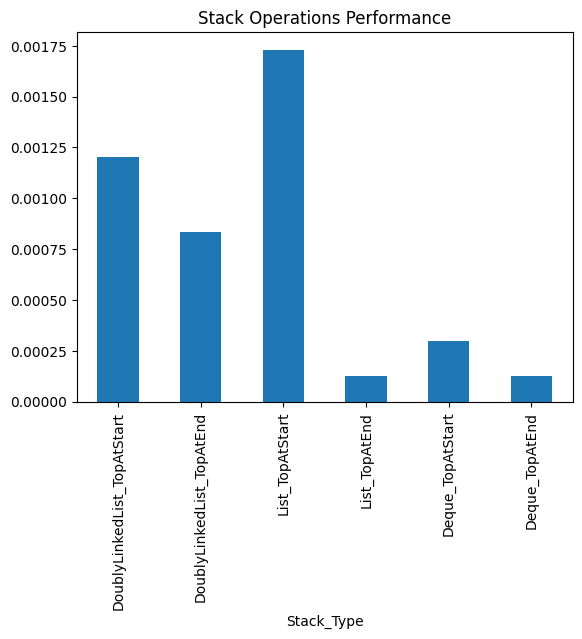

In [11]:
import time
from collections import deque

# Configuração do teste
def test_stack_operations(stack, operations, at_start=True):
    start_time = time.time()
    for op in operations:
        if op == "push":
            if at_start:
                stack.insert(0, 1) if isinstance(stack, list) else stack.appendleft(1)
            else:
                stack.append(1)
        elif op == "pop":
            if at_start:
                stack.pop(0) if isinstance(stack, list) else stack.popleft()
            else:
                stack.pop()
    end_time = time.time()
    return end_time - start_time


# Preparando operações (50% push, 50% pop)
operations = ["push"] * 5000 + ["pop"] * 5000

# Teste com DoublyLinkedList
class Node:
    def __init__(self, data):
        self.data = data
        self.next_node = None
        self.prev_node = None

class DoublyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None

    def push_left(self, value):
        new_node = Node(value)
        if not self.head:
            self.head = self.tail = new_node
        else:
            new_node.next_node = self.head
            self.head.prev_node = new_node
            self.head = new_node

    def push_right(self, value):
        new_node = Node(value)
        if not self.tail:
            self.head = self.tail = new_node
        else:
            new_node.prev_node = self.tail
            self.tail.next_node = new_node
            self.tail = new_node

    def pop_left(self):
        if not self.head:
            raise IndexError("pop from empty list")
        value = self.head.data
        self.head = self.head.next_node
        if self.head:
            self.head.prev_node = None
        else:
            self.tail = None
        return value

    def pop_right(self):
        if not self.tail:
            raise IndexError("pop from empty list")
        value = self.tail.data
        self.tail = self.tail.prev_node
        if self.tail:
            self.tail.next_node = None
        else:
            self.head = None
        return value


dll_stack = DoublyLinkedList()

def test_dll_stack(dll_stack, operations, at_start=True):
    start_time = time.time()
    for op in operations:
        if op == "push":
            dll_stack.push_left(1) if at_start else dll_stack.push_right(1)
        elif op == "pop":
            dll_stack.pop_left() if at_start else dll_stack.pop_right()
    end_time = time.time()
    return end_time - start_time


# Executando os testes
results = {
    "DoublyLinkedList_TopAtStart": test_dll_stack(dll_stack, operations, at_start=True),
    "DoublyLinkedList_TopAtEnd": test_dll_stack(dll_stack, operations, at_start=False),
    "List_TopAtStart": test_stack_operations([], operations, at_start=True),
    "List_TopAtEnd": test_stack_operations([], operations, at_start=False),
    "Deque_TopAtStart": test_stack_operations(deque(), operations, at_start=True),
    "Deque_TopAtEnd": test_stack_operations(deque(), operations, at_start=False),
}

import pandas as pd

# Displaying results
df_results = pd.DataFrame(list(results.items()), columns=["Stack_Type", "Execution_Time (s)"])

df_results.plot(kind="bar", x="Stack_Type", y="Execution_Time (s)", legend=False, title="Stack Operations Performance")